<a href="https://colab.research.google.com/github/butchland/fastai_xla_extensions/blob/master/explore_nbs/AWD_LSTM_small_patched_GPU_butch_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
!pip install git+https://github.com/butchland/my_timesaver_utils > /dev/null

  Running command git clone -q https://github.com/butchland/my_timesaver_utils /tmp/pip-req-build-w7xl87x3


In [4]:
# !pip install git+https://github.com/butchland/fastai_xla_extensions > /dev/null

In [5]:
!pip install fastai2 > /dev/null

In [6]:
# VERSION = "20200707" #@param ["1.5" ,"20200325", "20200515",  "20200707","nightly"]
# !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py > /dev/null
# !python pytorch-xla-env-setup.py --version $VERSION > /dev/null

In [7]:
!pip freeze | grep torch
!pip freeze | grep fastai2
!pip freeze | grep fastai_xla_extensions

torch==1.6.0+cu101
torchsummary==1.5.1
torchtext==0.3.1
torchvision==0.7.0+cu101
fastai2==0.0.25


In [8]:
# import fastai_xla_extensions.core

In [9]:
from fastai2.text.all import *

In [10]:
from my_timesaver_utils.profiling_callback import *

In [11]:
default_device()

device(type='cuda', index=0)

In [12]:
path = untar_data(URLs.IMDB_SAMPLE)

In [13]:
#hide
Path.BASE_PATH = path

In [14]:
path.ls()

(#1) [Path('texts.csv')]

In [15]:
df = pd.read_csv(path/'texts.csv')

In [16]:
dls = TextDataLoaders.from_df(df,path=path, text_col='text', label_col='label', valid_col='is_valid')

In [17]:
dls.device

device(type='cuda', index=0)

In [18]:
learner = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [19]:
learner.to_my_profile(); learner.my_profile.clear_stats()

In [20]:
learner.fit(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.728052,0.626946,0.655000,00:13
1,0.654839,0.580863,0.715000,00:11


In [21]:
learner.my_profile.print_stats()

fit  called 1 times. max: 24.686 avg: 24.686
   epoch  called 2 times. max: 13.007 avg: 12.340
      train  called 2 times. max: 9.787 avg: 9.116
         train_batch  called 24 times. max: 2.990 avg: 0.717
            train_pred  called 24 times. max: 2.939 avg: 0.708
            train_loss  called 24 times. max: 0.021 avg: 0.002
            train_backward  called 24 times. max: 0.006 avg: 0.002
            train_step  called 24 times. max: 0.015 avg: 0.003
            train_zero_grad  called 24 times. max: 0.009 avg: 0.003
      valid  called 2 times. max: 3.221 avg: 3.215
         valid_batch  called 8 times. max: 1.766 avg: 0.687
            valid_pred  called 8 times. max: 1.759 avg: 0.682
            valid_loss  called 8 times. max: 0.001 avg: 0.001


In [22]:
train_pred_stats = learner.my_profile.get_stats('train_pred')
train_step_stats = learner.my_profile.get_stats('train_step')
train_batch_stats = learner.my_profile.get_stats('train_batch')
valid_batch_stats = learner.my_profile.get_stats('valid_batch')
train_stats = learner.my_profile.get_stats('train')
valid_stats = learner.my_profile.get_stats('valid')
epoch_stats = learner.my_profile.get_stats('epoch')
fit_stats = learner.my_profile.get_stats('fit')

In [23]:
%matplotlib inline

In [24]:
def show_stats(data,title):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    plt.xlabel('batches', fontsize=18)
    plt.ylabel('secs', fontsize=16)
    plt.plot(data,);

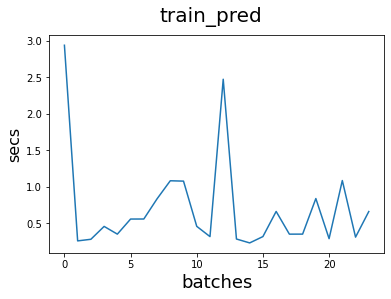

In [25]:
show_stats(train_pred_stats[2],'train_pred')

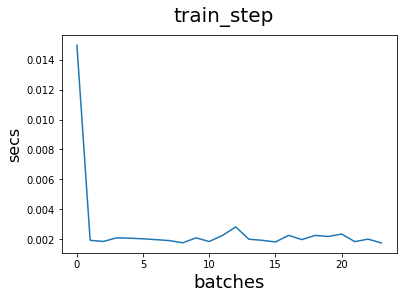

In [26]:
show_stats(train_step_stats[2],'train_step')

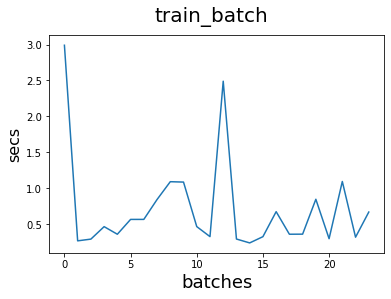

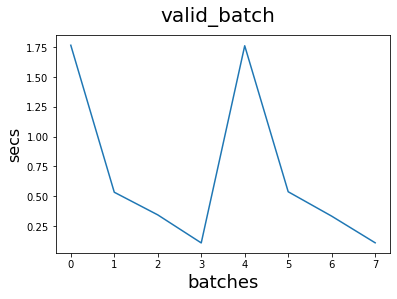

In [27]:
show_stats(train_batch_stats[2],'train_batch')
show_stats(valid_batch_stats[2],'valid_batch')

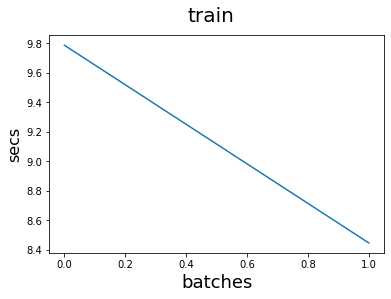

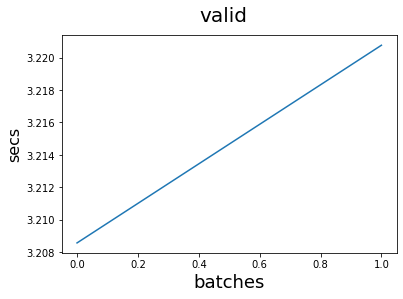

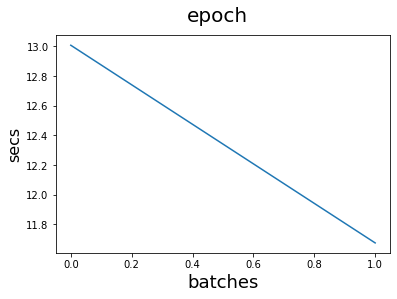

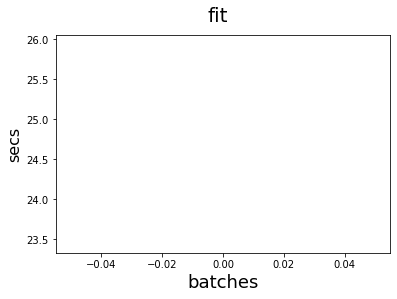

In [28]:
show_stats(train_stats[2],'train')
show_stats(valid_stats[2],'valid')
show_stats(epoch_stats[2],'epoch')
show_stats(fit_stats[2],'fit')